# PW 1 - Markovian models  
## Done by Haithem Daghmoura
Sampling of Markovian models.

The aim of this session is to program the Gibbs sampler algorithm and study it in the binary case.

In this section we consider a binary Markov random field (taking values in $E=\{0,1\}$).
The neighborhood is defined in 4-connexity and the potential of a clique of order 2 is defined by :
$U_c(0,1)=U_c(1,0)=+\beta$ and $U_c(1,1)=U_c(0,0)=0$ (the potential for singleton clique is 0).


In [76]:
import math
import random
import numpy as np
import platform
import tempfile
import os
import matplotlib.pyplot as plt
import imageio
from scipy import ndimage as ndi

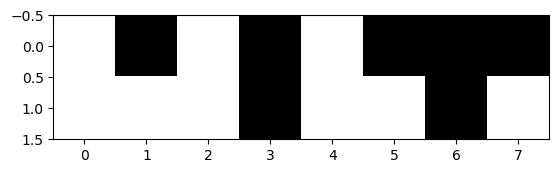

In [77]:
np.random.seed(5)
random.seed(5)
plt.set_cmap('gray')

sh=[2,8]

imaU=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(imaU)

#Q1
For the Ising model defined above, and the imaU generated in the previous cell, give the formula of the global energy and give its value as a function of $\beta$ for imaU.



#A1
$$U_x = \sum_{c \in C} V_c = \sum_{\{x,y\} \in C} (1-\delta (x,y)) \beta =12 \beta$$


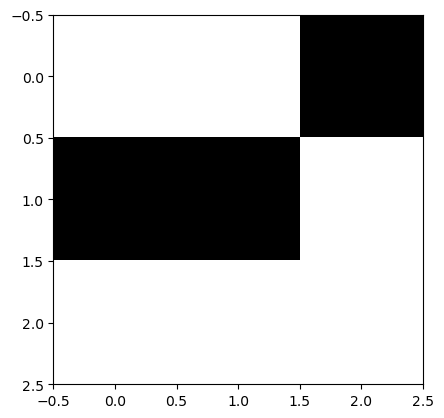

In [78]:
sh=[3,3]
imaVois=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(imaVois)

#Q2

Write the general form of the local conditional probability in a pixel $s$. For the neighborhood configuration imaVois generated by the previous code cell, compute the 2 local conditional energies (for the value 0 and for the value 1 of the central pixel), then the local conditional probabilities (as a function of $\beta$). What is the most probable class ? (NB: do the calculation for an 8-neighborhood).


#A2

$ P_r (X_s =x_s | V_s) = \frac {1}{Z^s} e^{-U_s(x_s,V_s)}$        with       $U_s(x_s,V_s) = \sum_{c \in C,s \in c} V_c(x_s,V_s) $ and $Z^s = \sum_{\xi \in E} e^{-U_s(\xi,V_s)}$

$$ U_s (X_s=0|0,0,1,0,0,0,0,1)= 6\beta$$ 
$$ U_s(x=1|0,0,1,0,0,0,0,1 ) =2\beta $$ 

we notice that the value 1 in this situation is more probable since $U_s(X_s=1|V_s) < U_s(X_s=0|V_s) $ and since  $P_r $ is a decreasing function of $U$ and thus we get $P_r(X_s = 1|V_s) > P_r(X_s=0|V_s) $

## Part 1

Programming the Gibbs sampler and drawing samples of Markovian models



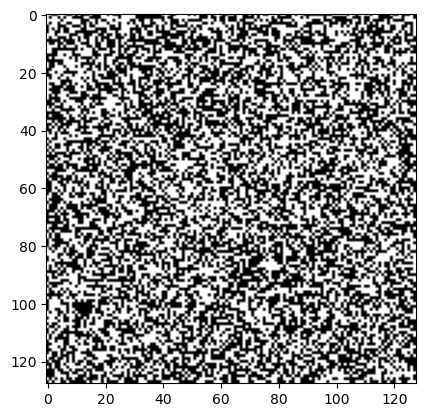

In [79]:
plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

### Sampling function
Complete the following function which takes as input a binary image (which will be updated by Gibbs sampling) and the value of the regularization parameter.


In [80]:
def echan(im_bin,beta_reg):

    i=0;
    j=0;

    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
          # do not change these indices
          # they allow access to neighboring pixels
          # i1,j and i2,j and i,j1 and i,j2
            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]

        # complete the calculation of energies and associated probabilities
        # energy and non-normalized proba when the pixel is put in class 0
            Ureg0=(im_bin[i,j1]+im_bin[i,j2]+im_bin[i1,j]+im_bin[i2,j])*beta_reg
            p0=math.exp(-Ureg0);

        # energy and non-normalized proba when the pixel is put in class 1
            Ureg1=(4-(im_bin[i,j1]+im_bin[i,j2]+im_bin[i1,j]+im_bin[i2,j]))*beta_reg
            p1=math.exp(-Ureg1);

        # sampling according to the normalized probabilities. NB: the normalization is done here
            if (p0+p1!=0.):
                if(random.uniform(0,1)<p0/(p0+p1)):
                    im_bin[i,j]=0
                else :
                    im_bin[i,j]=1

    return im_bin


By varying the value of the regularization parameter and restarting the cell, observe. You can remove the visualization during sampling and increase the number of iterations

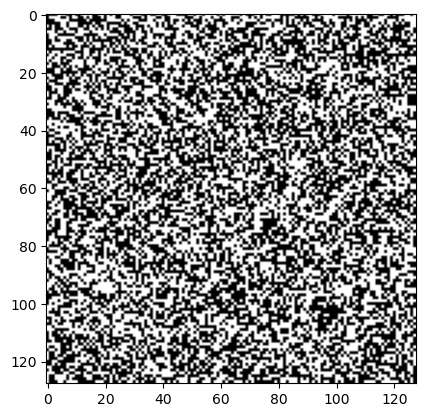

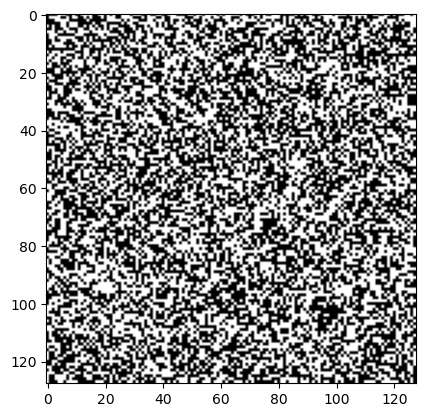

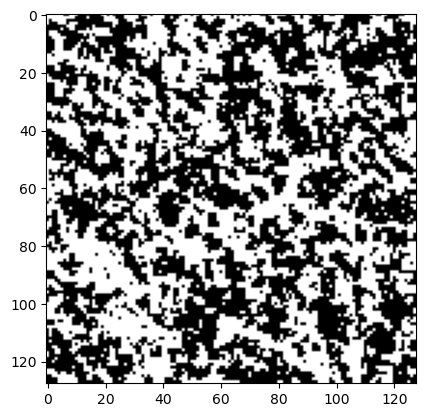

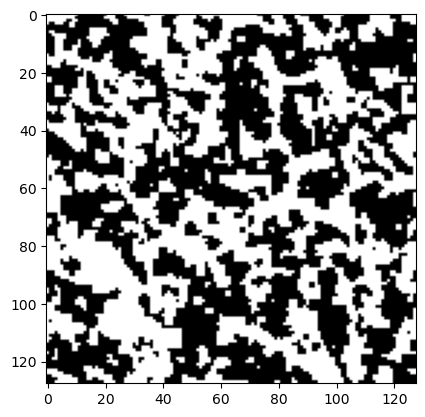

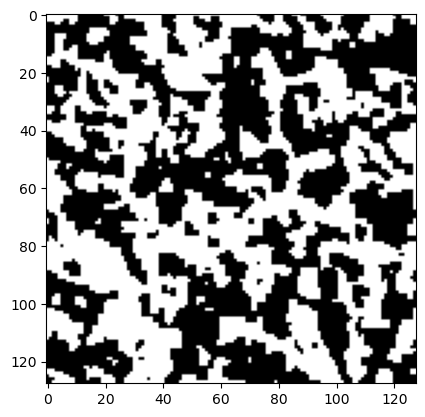

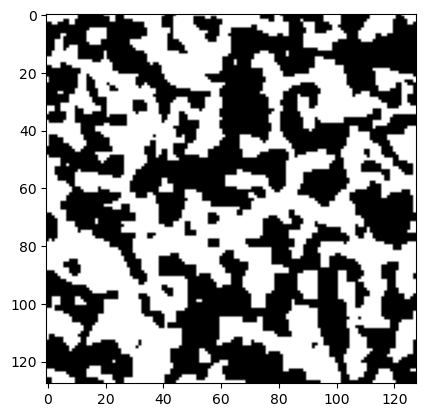

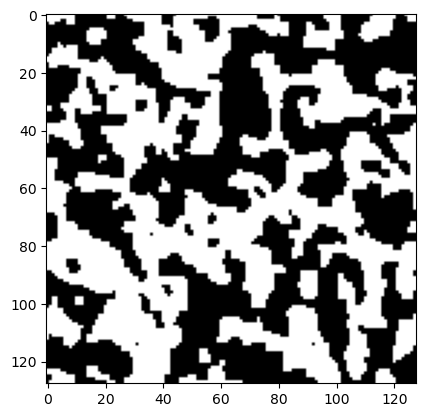

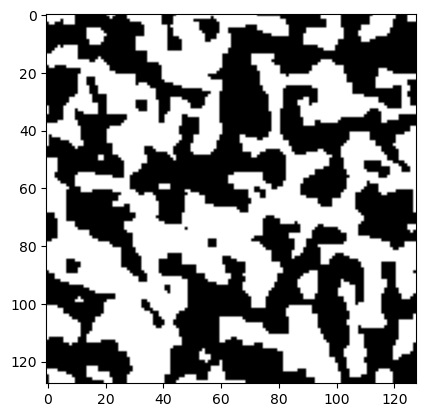

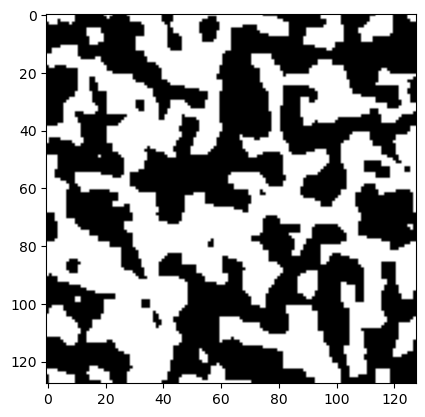

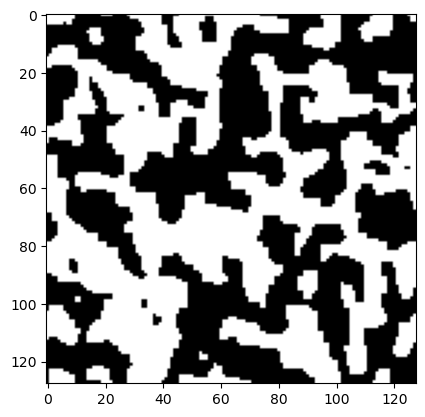

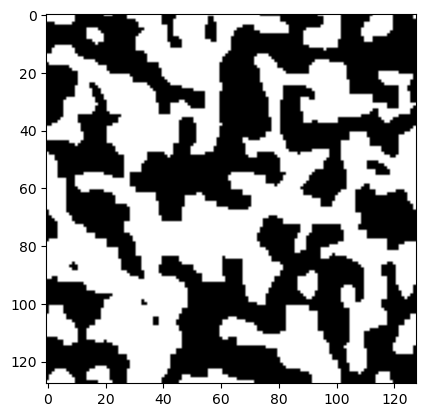

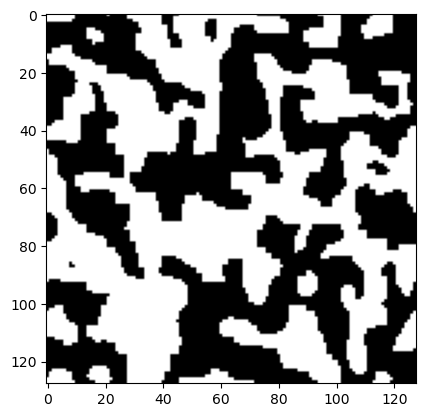

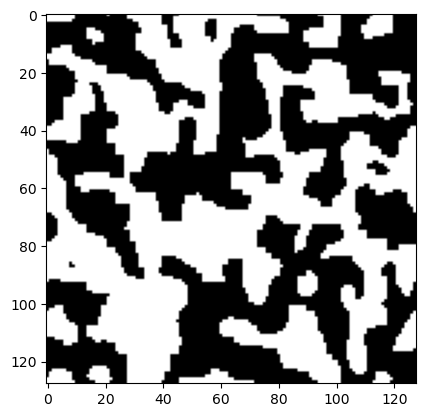

In [81]:

# random initialization of im_bin
plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

beta_reg=4

mafigure=plt.figure()
plt.imshow(im_bin);
mafigure.canvas.draw()
plt.show()

for n in range(10):
    echan(im_bin,beta_reg)
    plt.imshow(im_bin)
    mafigure.canvas.draw()
    plt.show(block=False)


plt.figure()
plt.imshow(im_bin)
plt.show()

#Q3
Run the program several times. Do you still get the same image? Comment on this.

#A3
No, we get different images each time.
In fact, here the algorithm is not deterministic but rather random. The outcome is obteined by random sampling using the distribution that we created

#Q4

Vary $\beta$ from 0.5 to 20. Comment on the results.

In [82]:
def test_beta (im_bin,beta_reg,it= 20) : 
    im_bin1=im_bin.copy()
    for n in range(it):
        im_bin1 = echan(im_bin1,beta_reg)
    return im_bin1

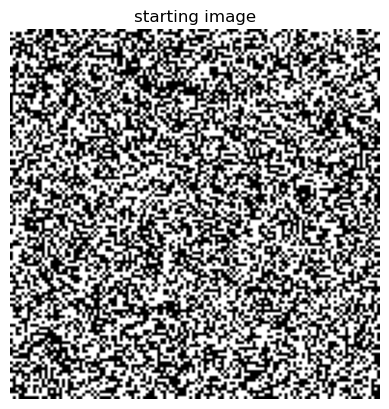

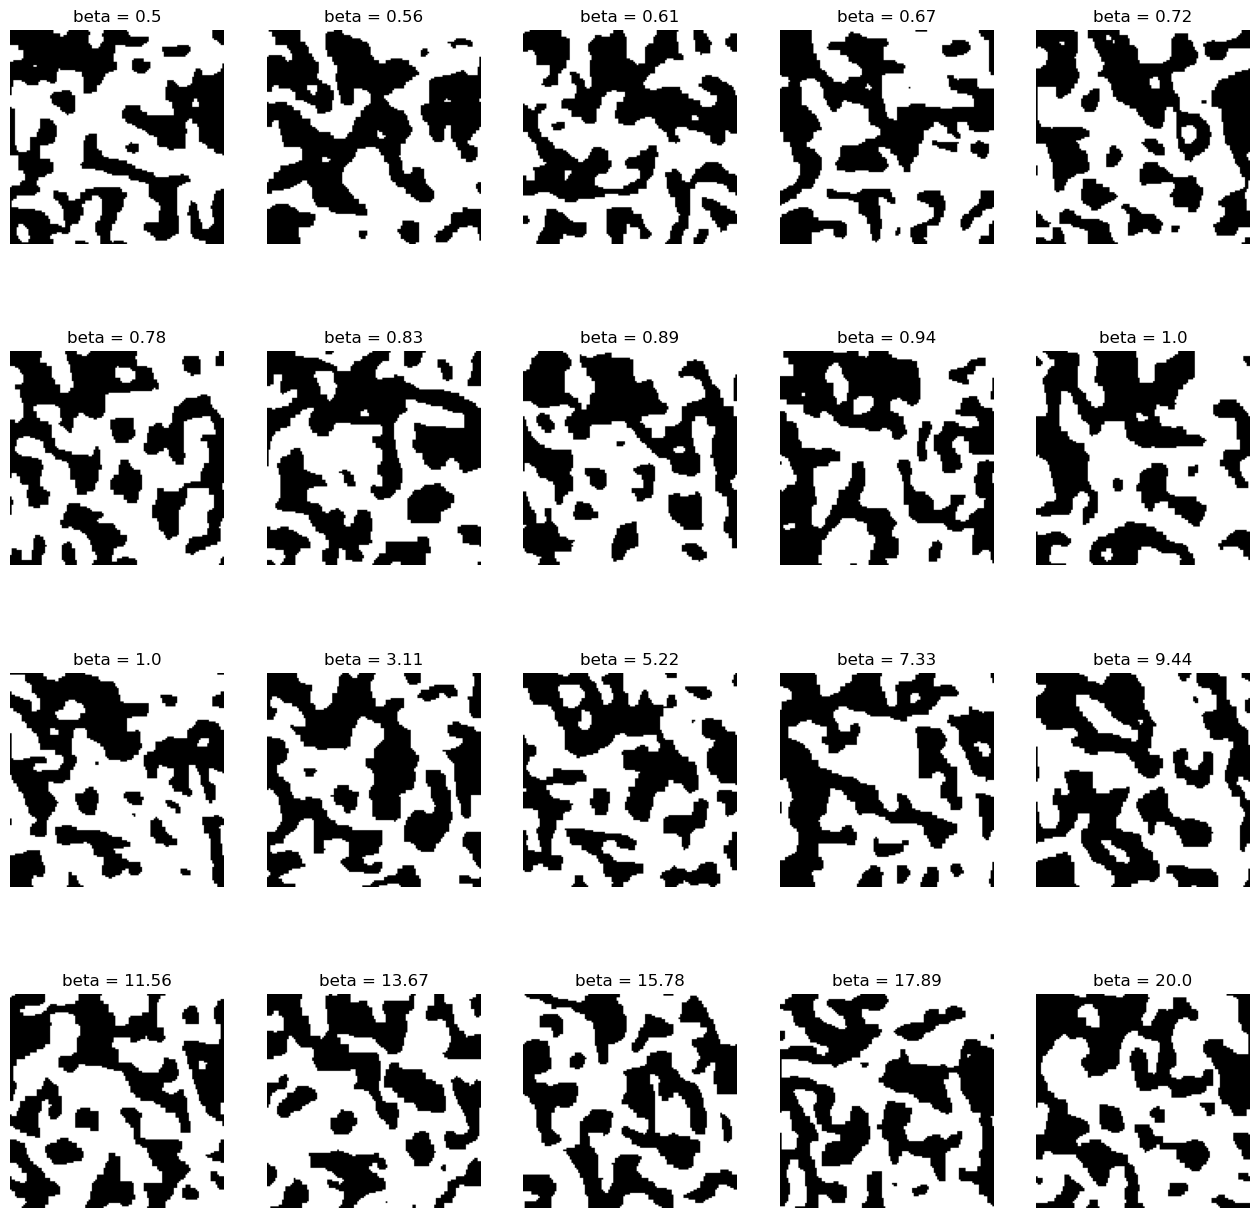

In [83]:
# creating list of beta values to test
betas =np.concatenate( (np.linspace (0.5,1,10), np.linspace(1,20,10)))

# random initialization of im_bin
plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.axis('off')
plt.title("starting image")
plt.imshow(im_bin)

fig,axes =plt.subplots(4,5,figsize=(16,16))
for i,beta in enumerate(betas) :
    axes[i//5,i%5].imshow(test_beta(im_bin,beta_reg,it= 20))
    axes[i//5,i%5].set_title(f"beta = {round(beta,2)}")
    axes[i//5,i%5].axis('off')
# Update the figure
fig.canvas.draw()

# Show the plot
plt.show(block=False)

#A4

the result will be increasingly compact areas, since the model will be increasingly restrictive
In fact when we vary the value of $\beta$ we get an image that is more and more well divided in regions and for very large values ($\beta \rightarrow  \infty $ ) we get a dirac distribution and thus the pixel will be the same as the majority of his neighborhood values

#Q5
Which image minimizes the overall energy for this model?

#A5
the image that minimizes the overall energy are the images that have the same value in all pixels (either all black or all white image)

#Q6
Change 𝛽 and give it a negative value. Describe the result and justify it.

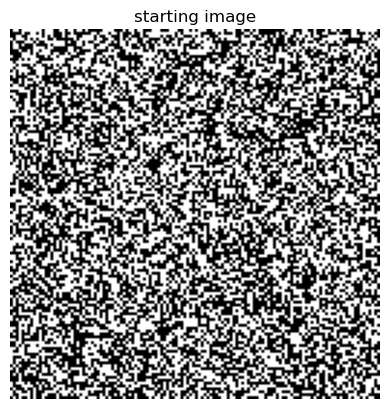

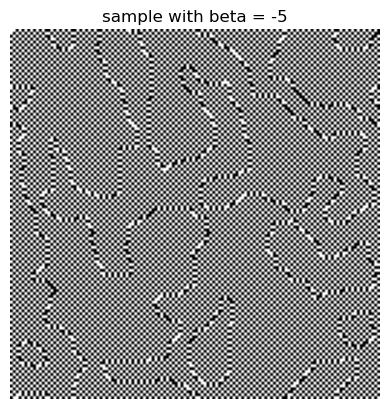

In [84]:
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)
plt.title ('starting image')
plt.axis('off')
plt.show()

beta_reg = -5
plt.imshow(test_beta(im_bin,beta_reg,it= 20))
plt.title(f"sample with beta = {beta_reg}")
plt.axis('off')
plt.show()


#A6

for negative values of beta we get an image that is close to checkerboard (damier in frensh) : that is pixels are tending to alternate the color. This is explained by the fact that our probability distribution favors the alternance between to neighberhood pixels and if we look at the expression obtained in question 2 we can see that for negative values of beta we get that $P_r$ will be higher for the value different of the majority of the neighberhood values

In [85]:
def echan1(im_bin,beta_reg):

    i=0;
    j=0;

    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):

            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]


            Ureg0=0
            p0=math.exp(-Ureg0);


            Ureg1=(4-(im_bin[i,j1]+im_bin[i,j2]+im_bin[i1,j]+im_bin[i2,j]))*beta_reg
            p1=math.exp(-Ureg1);


            if (p0+p1!=0.):
                if(random.uniform(0,1)<p0/(p0+p1)):
                    im_bin[i,j]=0
                else :
                    im_bin[i,j]=1

    return im_bin
#

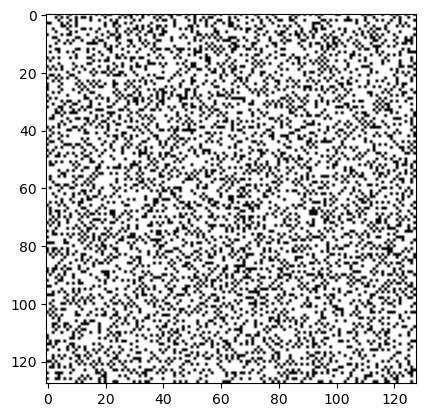

In [86]:

sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))

beta_reg=-1
for n in range(40):
    echan1(im_bin,beta_reg)

plt.figure()
plt.imshow(im_bin)
plt.show()

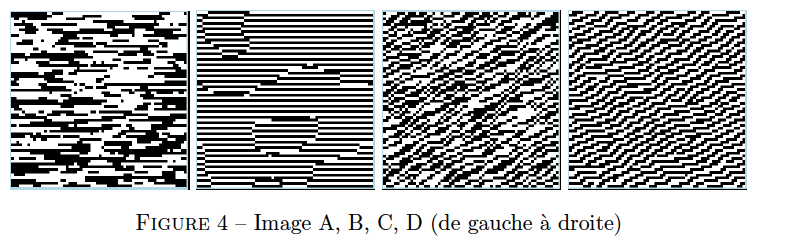

#Q7
We now work in 8-neighborhood, but still with cliques of order 2 (non-isotropic this time). For each of the following images, propose the clique potentials that allow us to obtain these realizations. Initially all clique potentials are zero.


* Image A : there is only one clique potential of order 2 which is -1.
* Image B : in addition to the previous one, there is a clique potential of order 2 which is 1. Indicate which one.
* Image C: in addition to the 2 previous ones, there is a clique potential of order 2 which is -1. Indicate which one.
* Image D: in addition to the 3 previous ones, there is a second order clique potential which is +1. Indicate which one.





#A7

For image A it is clear that we have somewhat horizental lignes and since the beta is negative our distribution is encouraging the horizental stability so the answear should be -1 for the potentiel of the horizental pixels $(V_c(0,0)=-1) $ and $(V_c(1,1) =-1)$ 

For image B it is clear that we have more defined alternating lines and we know that the beta coeff of 1 which means that we are penalizing some thing by giving it a bigger potential. So the answear is in addition to the first potentiel we make the potentiel of vertical neighbouring pixels equal to +1 : $(V_c(0,0)=1)$  and $(V_c(1,1) =1)$ 

For image C it is clear that the distrubtion is encaringing the change in the diagonal direction $+\frac{\pi}{4}$so the answear should be -1 for the potentiel of the vertical pixels $(V_c(0,0)=-1) $ and $(V_c(1,1) =-1)$ 

Finally, for image D it is clear that we have a somewhat same tendancy acrross the diagona direction $+\frac{3\pi}{4}$ and since the potentiel is +1 then the potentiel of diagonal $+\frac{\pi}{4}$ neighbouring pixels is equal to +1 in that direction: $(V_c(0,0)=1)$  and $(V_c(1,1) =1)$ 

#Q8

Modify your program to define an Ising model with a diagonal attractive potential only (the other potentials are zero). It means that this model **encourages** similar labels (either 0 or 1) for neighboring pixels in the diagonal directions ($\pi/4$ or $3\pi/4$ directions). Comment on the result.

#A8

In [87]:
def echanA(im_bin):

    i=0;
    j=0;

    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):

            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]


            Ureg0=(2-(im_bin[i,j1]+im_bin[i,j2]))*(-1)
            p0=math.exp(-Ureg0);


            Ureg1=(im_bin[i,j1]+im_bin[i,j2])*(-1)
            p1=math.exp(-Ureg1);


            if (p0+p1!=0.):
                if(random.uniform(0,1)<p0/(p0+p1)):
                    im_bin[i,j]=0
                else :
                    im_bin[i,j]=1
    
    return im_bin

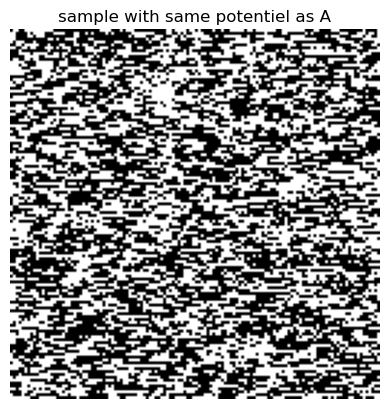

In [88]:
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
for n in range(100):
    echanA(im_bin)
    
plt.imshow(im_bin)
plt.title("sample with same potentiel as A")
plt.axis('off')
plt.show()

In [89]:
def echanB(im_bin):

    i=0;
    j=0;

    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
          # do not change these indices
          # they allow access to neighboring pixels
          # i1,j and i2,j and i,j1 and i,j2
            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]


            Ureg0=(2-(im_bin[i,j1]+im_bin[i,j2]))*(-1) +(2-(im_bin[i1,j]+im_bin[i2,j]))
            p0=math.exp(-Ureg0);


            Ureg1=(im_bin[i,j1]+im_bin[i,j2])*(-1) +((im_bin[i1,j]+im_bin[i2,j]))
            p1=math.exp(-Ureg1);


            if (p0+p1!=0.):
                if(random.uniform(0,1)<p0/(p0+p1)):
                    im_bin[i,j]=0
                else :
                    im_bin[i,j]=1
    
    return im_bin

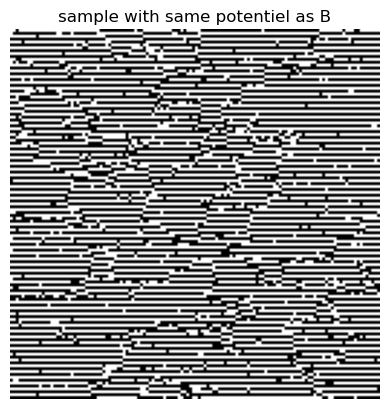

In [90]:

sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
for n in range(100):
    echanB(im_bin)
    
plt.title("sample with same potentiel as B")
plt.imshow(im_bin)
plt.axis('off')
plt.show()

In [91]:
def echanC(im_bin):

    i=0;
    j=0;

    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
            

            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]


            Ureg0=(2-(im_bin[i,j1]+im_bin[i,j2]))*(-1) +(2-(im_bin[i1,j]+im_bin[i2,j])) + (2-(im_bin[i1,j2]+im_bin[i2,j1]))*(-1) 
            p0=math.exp(-Ureg0);


            Ureg1=(im_bin[i,j1]+im_bin[i,j2])*(-1) +((im_bin[i1,j]+im_bin[i2,j]))+(im_bin[i1,j2]+im_bin[i2,j1])*(-1)
            p1=math.exp(-Ureg1);


            if (p0+p1!=0.):
                if(random.uniform(0,1)<p0/(p0+p1)):
                    im_bin[i,j]=0
                else :
                    im_bin[i,j]=1
    
    return im_bin

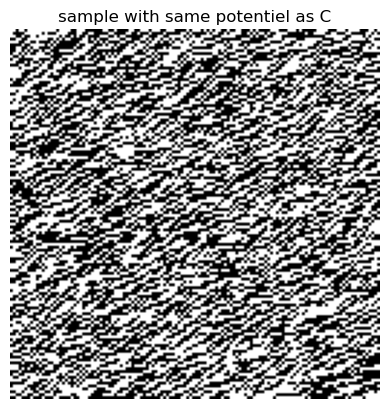

In [92]:
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
for n in range(100):
    echanC(im_bin)
plt.title("sample with same potentiel as C")
plt.imshow(im_bin)
plt.axis('off')
plt.show()

In [93]:
def echanD(im_bin):

    i=0;
    j=0;

    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
            

            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]


            Ureg0=(2-(im_bin[i,j1]+im_bin[i,j2]))*(-1) +(2-(im_bin[i1,j]+im_bin[i2,j])) + (2-(im_bin[i1,j2]+im_bin[i2,j1]))*(-1) + (2-(im_bin[i1,j1]+im_bin[i2,j2])) 
            p0=math.exp(-Ureg0);

            Ureg1=(im_bin[i,j1]+im_bin[i,j2])*(-1) +((im_bin[i1,j]+im_bin[i2,j]))+(im_bin[i1,j2]+im_bin[i2,j1])*(-1)+((im_bin[i1,j1]+im_bin[i2,j2]))
            p1=math.exp(-Ureg1);

            if (p0+p1!=0.):
                if(random.uniform(0,1)<p0/(p0+p1)):
                    im_bin[i,j]=0
                else :
                    im_bin[i,j]=1
    
    return im_bin

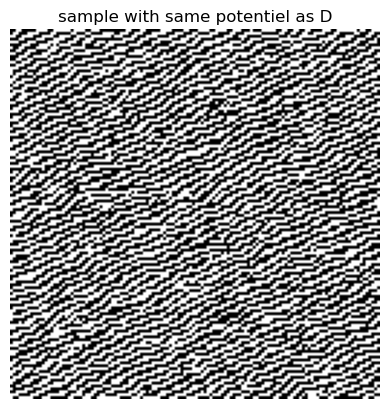

In [94]:
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
for n in range(100):
    echanD(im_bin)
plt.title("sample with same potentiel as D")
plt.imshow(im_bin)
plt.axis('off')
plt.show()

#Q9

In [95]:
def echanDiag(im_bin):

    i=0;
    j=0;

    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
            
            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]


            Ureg0=  (2-(im_bin[i1,j2]+im_bin[i2,j1]))*(-1) + (2-(im_bin[i1,j1]+im_bin[i2,j2])) *(-1)
            p0=math.exp(-Ureg0);


            Ureg1=(im_bin[i1,j2]+im_bin[i2,j1])*(-1)+((im_bin[i1,j1]+im_bin[i2,j2])) *(-1)
            p1=math.exp(-Ureg1);

  
            if (p0+p1!=0.):
                if(random.uniform(0,1)<p0/(p0+p1)):
                    im_bin[i,j]=0
                else :
                    im_bin[i,j]=1
    
    return im_bin

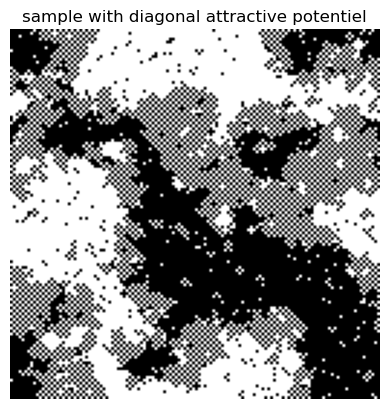

In [96]:
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
for n in range(100):
    echanDiag(im_bin)
plt.title("sample with diagonal attractive potentiel")
plt.imshow(im_bin)
plt.axis('off')
plt.show()